In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('clean_data.csv')
df1 = pd.read_csv('booking.csv')

In [4]:
df['Stay Date'] = pd.to_datetime(df['Stay Date'])

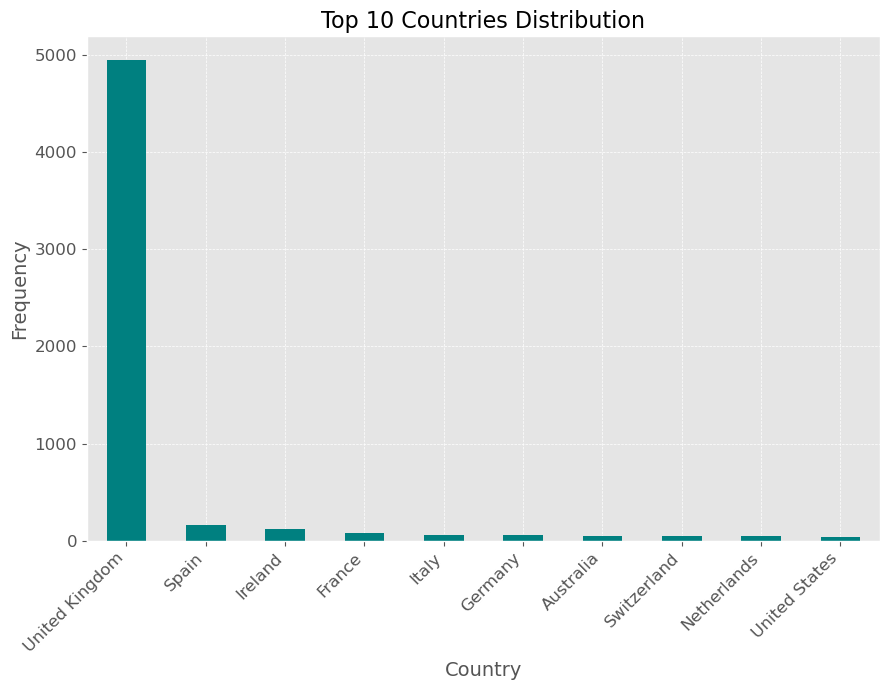

In [5]:
country_counts = df1['Country'].value_counts().head(10)
#ploting style
plt.style.use('ggplot')


plt.figure(figsize=(9, 7))  # Adjust the size 
country_counts.plot(kind='bar', color='teal')  

# Adding titles and labels with custom font sizes
plt.title('Top 10 Countries Distribution', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Improving the ticks for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)  
plt.yticks(fontsize=12)

# Adding a grid for better readability of the plot
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout() 
# Show the plot
plt.show()


In [6]:
df2 = df.copy() #copy of subset avoiding inconsistency

In [7]:
# Extract month from Stay Date
df2['Month'] = df2['Stay Date'].dt.month


In [8]:
# Group by Month and count occurrences
monthly_counts = df2.groupby('Month').size().reset_index(name='Count')


In [10]:
# Include year in the grouping for averaging across multiple years
df2['Year'] = df2['Stay Date'].dt.year
monthly_yearly_counts = df2.groupby(['Year', 'Month']).size().reset_index(name='Count')

#calculate the average
average_monthly_counts = monthly_yearly_counts.groupby('Month')['Count'].mean().reset_index()


C:\Users\nevea\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


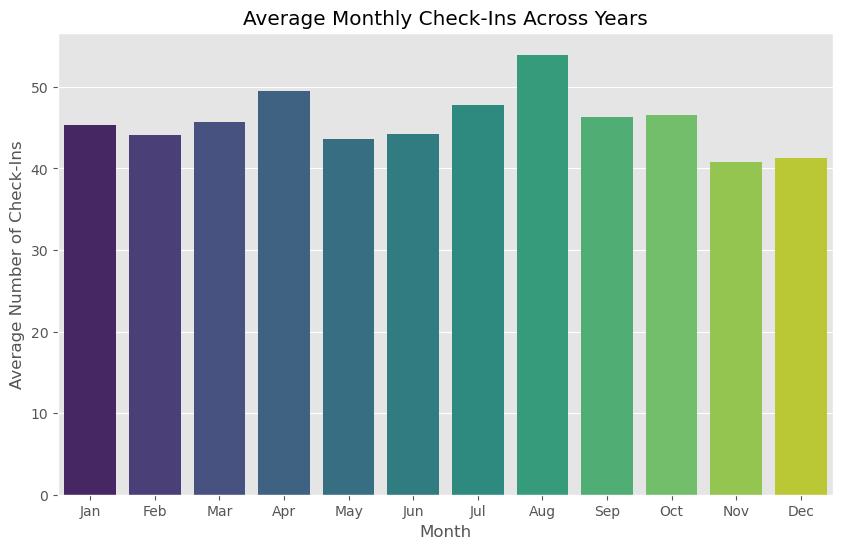

In [11]:
#sorted
average_monthly_counts['Month'] = pd.Categorical(average_monthly_counts['Month'], categories=range(1, 13), ordered=True)
average_monthly_counts = average_monthly_counts.sort_values('Month')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Count', data=average_monthly_counts, palette='viridis')
plt.title('Average Monthly Check-Ins Across Years')
plt.xlabel('Month')
plt.ylabel('Average Number of Check-Ins')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


In [12]:
# Group by Year and count occurrences
yearly_counts = df2.groupby('Year').size().reset_index(name='Count')


C:\Users\nevea\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nevea\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


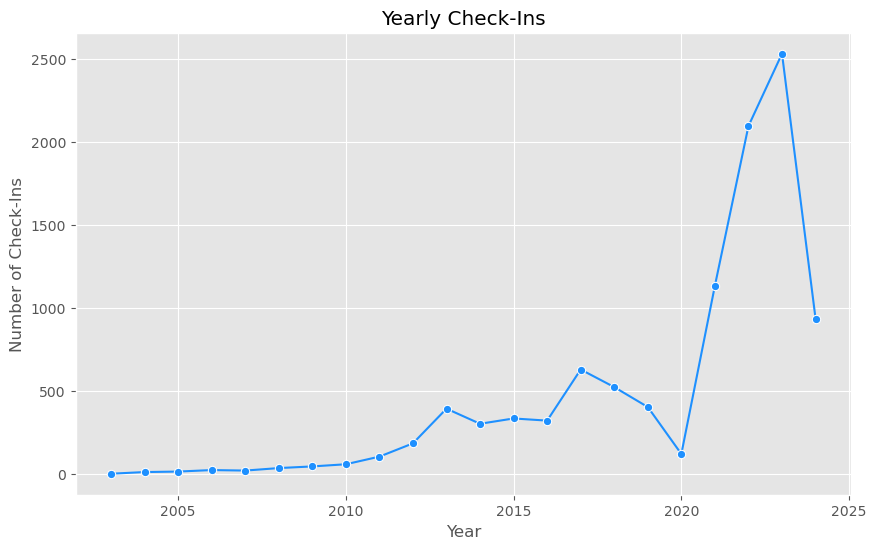

In [13]:
# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Count', data=yearly_counts, marker='o', color='dodgerblue')
plt.title('Yearly Check-Ins')
plt.xlabel('Year')
plt.ylabel('Number of Check-Ins')
plt.grid(True)
plt.show()
